In [1]:
import pandas as pd
import numpy as np
from NLP_MH import DataIngest
import ML_Data
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import nltk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, precision_recall_fscore_support

In [2]:
mh_data = DataIngest.readPickle("ML_Data/", "log_reg_df")

              label                                               body  \
0           Venting  last april after i found out my ex had lied to...   
1           Venting  i have an issue that has affected my life for ...   
2           Venting  i wouldn t even know where to start i know mor...   
3           Venting  well another concert even immediately after i ...   
4           Venting  i just need to get this off my chest i feel li...   
...             ...                                                ...   
48790  Need Support  m22 i work full time and i'm trying to fill ou...   
48791       Venting  i already made a few posts here but its gettin...   
48792  Need Support  hi all ta account i am forced to live with som...   
48793       Venting  yesterday i needed to take the train somewhere...   
48794  Need Support  my mental health has been going bad this year ...   

                                            body_stem_sw  \
0      last april found ex lie upset thing complet 

In [3]:
mh_df = pd.DataFrame(mh_data)

In [4]:
mh_df = mh_df.rename(columns={'body': 'text'})

In [5]:
cat_df = pd.json_normalize(mh_df["categories"])

In [6]:
cat_df["body"]

0        0.024129
1        0.002841
2        0.000000
3        0.004950
4        0.010363
           ...   
48790    0.008197
48791    0.007692
48792    0.000000
48793    0.000000
48794    0.007326
Name: body, Length: 48795, dtype: float64

In [7]:
mh_df = pd.concat([mh_df, cat_df], axis = 1)

In [8]:
mh_df['body']

0        0.024129
1        0.002841
2        0.000000
3        0.004950
4        0.010363
           ...   
48790    0.008197
48791    0.007692
48792    0.000000
48793    0.000000
48794    0.007326
Name: body, Length: 48795, dtype: float64

In [9]:
mh_df.drop("categories", axis=1)

,label,text,body_stem_sw,length,pronoun_count,num_stopwords,help,office,dance,money,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
0,Venting,last april after i found out my ex had lied to...,last april found ex lie upset thing complet br...,3448,280,415,0.002681,0.001340,0.0,0.001340,...,0.002681,0.005362,0.0,0.0,0.001340,0.006702,0.001340,0.001340,0.006702,0.001340
1,Venting,i have an issue that has affected my life for ...,issu affect life long time i'm 19 year old alw...,1769,157,178,0.000000,0.008523,0.0,0.000000,...,0.000000,0.002841,0.0,0.0,0.005682,0.002841,0.008523,0.002841,0.002841,0.000000
2,Venting,i wouldn t even know where to start i know mor...,even know start know wrong confirm time ago so...,769,57,90,0.006452,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.025806,0.000000
3,Venting,well another concert even immediately after i ...,well anoth concert even immedi snap back bpd m...,982,77,115,0.000000,0.000000,0.0,0.000000,...,0.009901,0.000000,0.0,0.0,0.000000,0.009901,0.000000,0.000000,0.014851,0.009901
4,Venting,i just need to get this off my chest i feel li...,need get chest feel like peopl tell lest scare...,963,76,97,0.005181,0.015544,0.0,0.005181,...,0.000000,0.005181,0.0,0.0,0.005181,0.010363,0.000000,0.000000,0.015544,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48790,Need Support,m22 i work full time and i'm trying to fill ou...,m22 work full time i'm tri fill applic grad sc...,1232,100,135,0.000000,0.004098,0.0,0.000000,...,0.000000,0.008197,0.0,0.0,0.000000,0.008197,0.000000,0.000000,0.000000,0.000000
48791,Venting,i already made a few posts here but its gettin...,alreadi made post get wors wors everyday feel ...,622,43,69,0.007692,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.007692,0.023077,0.000000,0.007692,0.030769,0.000000
48792,Need Support,hi all ta account i am forced to live with som...,hi ta account forc live someon narcissist beha...,1000,88,121,0.004926,0.000000,0.0,0.000000,...,0.000000,0.004926,0.0,0.0,0.000000,0.000000,0.000000,0.009852,0.004926,0.000000
48793,Venting,yesterday i needed to take the train somewhere...,yesterday need take train somewher stood stati...,290,24,36,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
mh_df["pronoun_count_frequency"] = mh_df["pronoun_count"] / mh_df["length"]

In [11]:
mh_df["num_stopwords_frequency"] =  mh_df["num_stopwords"] / mh_df["length"]

In [12]:
y = mh_df["label"].replace({'Venting': 0, 'Need Support': 1})

In [13]:
columns_to_keep = mh_df.columns[~mh_df.columns.isin(['text', 'categories', 'label', 'body_stem_sw', "pronoun_count","num_stopwords"])]

x = mh_df[columns_to_keep]

In [14]:
x

,length,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,...,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical,pronoun_count_frequency,num_stopwords_frequency
0,3448,0.002681,0.001340,0.0,0.001340,0.000000,0.009383,0.001340,0.014745,0.008043,...,0.0,0.0,0.001340,0.006702,0.001340,0.001340,0.006702,0.001340,0.081206,0.120360
1,1769,0.000000,0.008523,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.002841,...,0.0,0.0,0.005682,0.002841,0.008523,0.002841,0.002841,0.000000,0.088751,0.100622
2,769,0.006452,0.000000,0.0,0.000000,0.000000,0.000000,0.006452,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.025806,0.000000,0.074122,0.117035
3,982,0.000000,0.000000,0.0,0.000000,0.009901,0.000000,0.000000,0.000000,0.004950,...,0.0,0.0,0.000000,0.009901,0.000000,0.000000,0.014851,0.009901,0.078411,0.117108
4,963,0.005181,0.015544,0.0,0.005181,0.010363,0.005181,0.000000,0.010363,0.005181,...,0.0,0.0,0.005181,0.010363,0.000000,0.000000,0.015544,0.000000,0.078920,0.100727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48790,1232,0.000000,0.004098,0.0,0.000000,0.008197,0.004098,0.004098,0.004098,0.008197,...,0.0,0.0,0.000000,0.008197,0.000000,0.000000,0.000000,0.000000,0.081169,0.109578
48791,622,0.007692,0.000000,0.0,0.000000,0.007692,0.000000,0.000000,0.000000,0.007692,...,0.0,0.0,0.007692,0.023077,0.000000,0.007692,0.030769,0.000000,0.069132,0.110932
48792,1000,0.004926,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.009852,0.004926,0.000000,0.088000,0.121000
48793,290,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082759,0.124138


In [66]:
a  

IndexError: single positional indexer is out-of-bounds

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [62]:
# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred = model.predict(X_test)

In [64]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5294599856542679


In [65]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.49710983, 0.53004381]),
 array([0.0187323 , 0.98316563]),
 array([0.03610411, 0.68876237]),
 array([4591, 5168]))

In [20]:
from scipy.stats import chi2_contingency
chi2_results = []

# Iterate over each predictor column
for col in x.columns:
    # Create a contingency table between the predictor column and the label column
    contingency_table = pd.crosstab(x[col], mh_df['label'])
    
    # Compute the chi-squared statistic and p-value
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    
    # Append the results to the list
    chi2_results.append({'Predictor': col, 'Chi-squared Statistic': chi2_stat, 'p-value': p_val})

# Convert the results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

print(chi2_results_df)

                   Predictor  Chi-squared Statistic       p-value
0                     length            5477.518710  5.744292e-02
1                       help            4512.211647  2.275762e-17
2                     office            2786.871263  9.438398e-02
3                      dance            1615.660510  2.548750e-01
4                      money            2852.223447  4.374099e-01
..                       ...                    ...           ...
192                    rural            2064.644417  1.936141e-01
193         positive_emotion            5409.231720  3.313455e-02
194                  musical            2077.951702  6.238673e-01
195  pronoun_count_frequency           23749.893791  2.346121e-01
196  num_stopwords_frequency           26533.707591  3.473314e-01

[197 rows x 3 columns]


In [21]:
chi2_results_df

,Predictor,Chi-squared Statistic,p-value
0,length,5477.518710,5.744292e-02
1,help,4512.211647,2.275762e-17
2,office,2786.871263,9.438398e-02
3,dance,1615.660510,2.548750e-01
4,money,2852.223447,4.374099e-01
...,...,...,...
192,rural,2064.644417,1.936141e-01
193,positive_emotion,5409.231720,3.313455e-02
194,musical,2077.951702,6.238673e-01
195,pronoun_count_frequency,23749.893791,2.346121e-01


In [22]:
chi2_results_df_sorted = chi2_results_df.sort_values(by='p-value')

In [23]:
stat_sig = chi2_results_df_sorted.head(30)

In [24]:
vent_df = mh_df[mh_df["label"] == "Venting"]

In [25]:
ns_df = mh_df[mh_df["label"] == "Need Support"]

In [ ]:
vent_prop = []
ns_prop = []
for pred in stat_sig["Predictor"]: 
    vent_val = vent_df[pred].sum()/ len(vent_df)
    ns_val = ns_df[pred].sum()/ len(ns_df)
    vent_prop.append(vent_val)
    ns_prop.append(ns_val)
stat_sig["Proporting in Venting"] = vent_prop
stat_sig["Proportion in Need Support"] = ns_prop

In [27]:
stat_sig

,Predictor,Chi-squared Statistic,p-value,Proporting in Venting,Proportion in Need Support
1,help,4512.211647,2.275762e-17,0.003923,0.006213
14,envy,2719.527287,1.931240e-08,0.002069,0.001250
29,swearing_terms,3601.516249,2.192323e-05,0.004196,0.003070
10,hate,5048.960051,3.029289e-04,0.009852,0.008632
64,childish,3373.807507,9.653062e-04,0.003087,0.002552
189,giving,3959.005245,1.043500e-03,0.004211,0.005277
48,ridicule,2260.578934,2.859628e-03,0.001178,0.000821
58,fear,4481.479459,3.147239e-03,0.006100,0.007587
22,health,5834.287826,6.547910e-03,0.010361,0.012178
174,negative_emotion,6834.339413,7.215557e-03,0.025690,0.023373


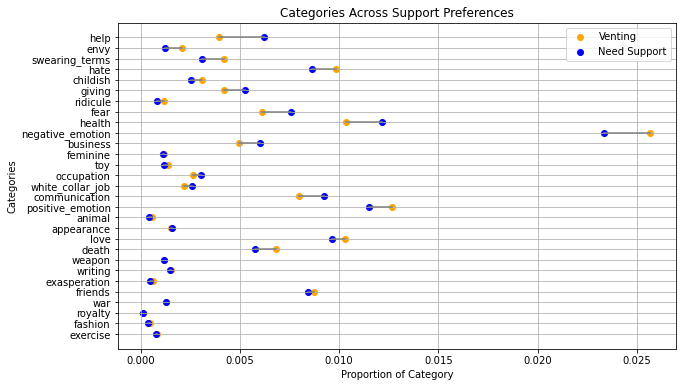

In [44]:
import matplotlib.pyplot as plt


cat_sig = stat_sig[stat_sig['Predictor'] != 'length']
# Sample data
categories = list(cat_sig["Predictor"])
values1 = list(cat_sig["Proporting in Venting"])
values2 = list(cat_sig["Proportion in Need Support"])
categories = categories[::-1]
values1= values1[::-1]
values2= values2[::-1]
plt.figure(figsize=(10, 6))
# Plotting the horizontal dumbbell plot for values1 (orange)
plt.scatter(values1, categories, color='orange', label='Venting')

# Plotting the horizontal dumbbell plot for values2 (blue)
plt.scatter(values2, categories, color='blue', label='Need Support')

# Plotting lines between each blue and orange dot for each category
for i, cat in enumerate(categories):
    plt.plot([values1[i], values2[i]], [cat, cat], color='grey', linestyle='-')

# Adding labels and title
plt.xlabel('Proportion of Category')
plt.ylabel('Categories')
plt.title('Categories Across Support Preferences')


# Adding legend
plt.legend()

# Display plot
plt.grid(True)
plt.show()

In [45]:
vent_df["envy"].sum()/ len(vent_df)


0.0020693682276838256

In [46]:
ns_df["envy"].sum()/ len(ns_df)

0.0012497796021596582

In [47]:
new_pred = chi2_results_df_sorted[1:25]

In [48]:
x1 = mh_df[new_pred["Predictor"]]

In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
48790    1
48791    0
48792    1
48793    0
48794    1
Name: label, Length: 48795, dtype: int64

In [50]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y, test_size=0.2, random_state=42)

In [60]:
len(X_train1)


39036

In [51]:
# Create a Logistic Regression model
model1 = LogisticRegression()

# Fit the model to the training data
model1.fit(X_train1, y_train1)

LogisticRegression()

In [52]:
y_pred1 = model1.predict(X_test1)

In [53]:
accuracy1 = accuracy_score(y_test1, y_pred1)
print("Accuracy:", accuracy1)

Accuracy: 0.5294599856542679


In [54]:
precision_recall_fscore_support(y_test1, y_pred1)

(array([0.49710983, 0.53004381]),
 array([0.0187323 , 0.98316563]),
 array([0.03610411, 0.68876237]),
 array([4591, 5168]))

In [55]:
.5294599856542679
.5294599856542679

0.5294599856542679

In [56]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [57]:
analyzer = SentimentIntensityAnalyzer()

In [58]:
mh_df["text"]

0        last april after i found out my ex had lied to...
1        i have an issue that has affected my life for ...
2        i wouldn t even know where to start i know mor...
3        well another concert even immediately after i ...
4        i just need to get this off my chest i feel li...
                               ...                        
48790    m22 i work full time and i'm trying to fill ou...
48791    i already made a few posts here but its gettin...
48792    hi all ta account i am forced to live with som...
48793    yesterday i needed to take the train somewhere...
48794    my mental health has been going bad this year ...
Name: text, Length: 48795, dtype: object